In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # <-- Required for countplot
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load data (e.g., CSV with "text" and "label" columns)
data = pd.read_csv('receipts.csv')
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'])

# Convert text to numbers
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Train and evaluate
model = LogisticRegression()
model.fit(X_train_vec, y_train)
accuracy = model.score(vectorizer.transform(X_test), y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 33.33%


In [21]:
# --- NEW: Show document types in the CSV ---
print("📄 Document Types in Dataset:")
print(data['label'].unique())  # e.g., ['invoice' 'receipt' 'email' ...]

📄 Document Types in Dataset:
['invoice' 'receipt' 'email' 'report' 'contract']


In [38]:
print("\n📊 Document Counts:")
print(data['label'].value_counts())


📊 Document Counts:
label
invoice     3
report      3
receipt     2
email       2
contract    2
Name: count, dtype: int64


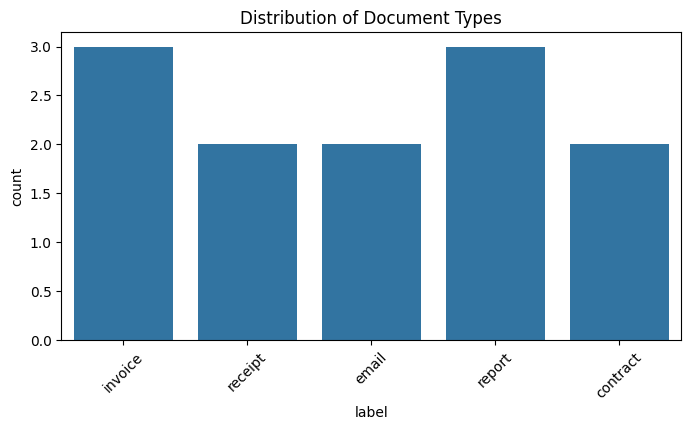

In [36]:

# Visualize distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=data)  # Now works!
plt.title("Distribution of Document Types")
plt.xticks(rotation=45)
plt.show()

# Rest of the code (training/prediction)...

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=42
)

# Vectorize text
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Test accuracy
accuracy = model.score(vectorizer.transform(X_test), y_test)
print(f"\n🔍 Model Accuracy: {accuracy * 100:.2f}%")


🔍 Model Accuracy: 0.00%


In [42]:
# --- NEW: Show a sample prediction ---
sample_text = "Invoice #123 Date: 2023-12-01 Total: $200"
sample_vec = vectorizer.transform([sample_text])
predicted_label = model.predict(sample_vec)[0]
print(f"\n🤖 Predicted label for '{sample_text[:20]}...': {predicted_label}")


🤖 Predicted label for 'Invoice #123 Date: 2...': report
